In [1]:
import sys
pkg_path = '/media/khaledghobashy/New Volume/Main/asurt_cdt_symbolic'
pkg_path = r'C:\Users\khaled.ghobashy\Desktop\asurt_cdt_symbolic'
sys.path.append(pkg_path)

# SYSTEM DISCRIPTION
--------------------

_Double click to write a discription here ..._

# SYSTEM TOPOLOGY
--------------------

In [2]:
from source.interfaces.scripting_interfaces import topology

In [3]:
topology_name = 'double_wishbone_direct_acting'
template = topology(topology_name)

## ADDING SYSTEM BODIES

In [4]:
template.add_body('uca', mirrored=True)
template.add_body('lca', mirrored=True)
template.add_body('upright', mirrored=True)
template.add_body('upper_strut', mirrored=True)
template.add_body('lower_strut' ,mirrored=True)
template.add_body('tie_rod', mirrored=True)
template.add_body('hub', mirrored=True)
template.add_body('steer', mirrored=True, virtual=True)
template.add_body('chassis', virtual=True)

## ADDING SYSTEM JOINTS

In [5]:
template.add_joint.spherical('uca_upright', 'rbr_uca', 'rbr_upright', mirrored=True)
template.add_joint.spherical('lca_upright', 'rbr_lca', 'rbr_upright', mirrored=True)
template.add_joint.spherical('tie_upright', 'rbr_tie_rod', 'rbr_upright', mirrored=True)
template.add_joint.revolute('uca_chassis', 'rbr_uca', 'vbs_chassis', mirrored=True)
template.add_joint.revolute('lca_chassis', 'rbr_lca', 'vbs_chassis', mirrored=True)
template.add_joint.revolute('hub_bearing', 'rbr_upright', 'rbr_hub', mirrored=True)
template.add_joint.universal('strut_chassis', 'rbr_upper_strut', 'vbs_chassis', mirrored=True)
template.add_joint.universal('strut_lca', 'rbr_lower_strut', 'rbr_lca', mirrored=True)
template.add_joint.universal('tie_steering', 'rbr_tie_rod', 'vbr_steer', mirrored=True)
template.add_joint.cylinderical('strut', 'rbr_upper_strut', 'rbr_lower_strut', mirrored=True)

## ADDING SYSTEM FORCES

In [6]:
template.add_force.internal_force('strut', 'rbr_upper_strut', 'rbr_lower_strut', mirrored=True)

## Assembling and Saving the System

In [7]:
template.assemble_model()
template.save()
template.write_python_code()

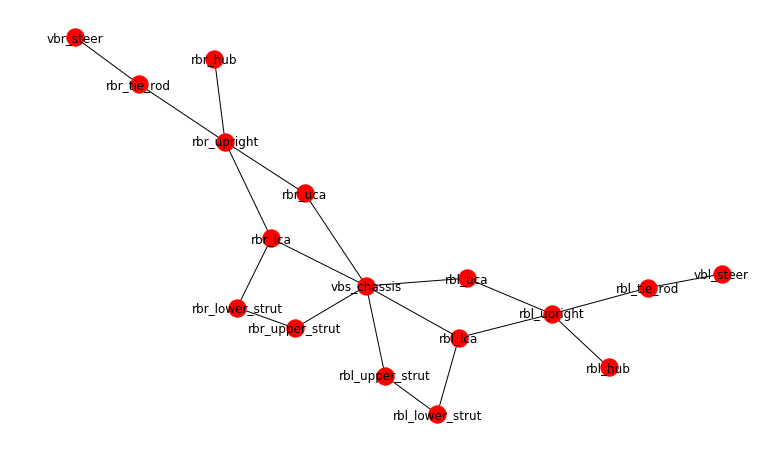

In [9]:
template._mbs.draw_constraints_topology()

--------------------

# SYSTEM CONFIGURATION
----------------------

In [10]:
from source.interfaces.scripting_interfaces import configuration

In [11]:
configuration_name = 'dwb_da_cfg'
config = configuration(configuration_name, template)

## CONFIGURATION POINTS

In [12]:
config.add_point.UserInput('ucaf', mirror=True)
config.add_point.UserInput('ucar', mirror=True)
config.add_point.UserInput('ucao', mirror=True)
config.add_point.UserInput('lcaf', mirror=True)
config.add_point.UserInput('lcar', mirror=True)
config.add_point.UserInput('lcao', mirror=True)
config.add_point.UserInput('tro', mirror=True)
config.add_point.UserInput('tri', mirror=True)
config.add_point.UserInput('strut_chassis', mirror=True)
config.add_point.UserInput('strut_lca', mirror=True)
config.add_point.UserInput('strut_mid', mirror=True)
config.add_point.UserInput('wc', mirror=True)
config.add_point.Centered('strut_mid', ('hpr_strut_chassis', 'hpr_strut_lca'), mirror=True)

## ASSIGNING JOINTS' CONFIGURATION

In [13]:
# Spherical Joints:
config.add_relation.Equal_to('pt1_jcr_uca_upright', ('hpr_ucao',), mirror=True)
config.add_relation.Equal_to('pt1_jcr_lca_upright', ('hpr_lcao',), mirror=True)
config.add_relation.Equal_to('pt1_jcr_tie_upright', ('hpr_tro',), mirror=True)

# Upper Control Arm Revolute Joint:
config.add_relation.Centered('pt1_jcr_uca_chassis', ('hpr_ucaf','hpr_ucar'), mirror=True)
config.add_relation.Oriented('ax1_jcr_uca_chassis', ('hpr_ucaf','hpr_ucar'), mirror=True)

# Lower Control Arm Revolute Joint:
config.add_relation.Centered('pt1_jcr_lca_chassis', ('hpr_lcaf','hpr_lcar'), mirror=True)
config.add_relation.Oriented('ax1_jcr_lca_chassis', ('hpr_lcaf','hpr_lcar'), mirror=True)

# Wheel Hub Revolute Joint:
config.add_relation.Equal_to('pt1_jcr_hub_bearing', ('hpr_wc',), mirror=True)

# Strut-Chassis Universal Joint:
config.add_relation.Equal_to('pt1_jcr_strut_chassis', ('hpr_strut_chassis',), mirror=True)
config.add_relation.Oriented('ax1_jcr_strut_chassis', ('hpr_strut_chassis','hpr_strut_lca'), mirror=True)
config.add_relation.Oriented('ax2_jcr_strut_chassis', ('hpr_strut_lca','hpr_strut_chassis'), mirror=True)

# Strut-LCA Universal Joint:
config.add_relation.Equal_to('pt1_jcr_strut_lca', ('hpr_strut_lca',), mirror=True)
config.add_relation.Oriented('ax1_jcr_strut_lca', ('hpr_strut_chassis','hpr_strut_lca'), mirror=True)
config.add_relation.Oriented('ax2_jcr_strut_lca', ('hpr_strut_lca','hpr_strut_chassis'), mirror=True)

# Tie-Steer Universal Joint:
config.add_relation.Equal_to('pt1_jcr_tie_steering', ('hpr_tri',), mirror=True)
config.add_relation.Oriented('ax1_jcr_tie_steering', ('hpr_tri','hpr_tro'), mirror=True)
config.add_relation.Oriented('ax2_jcr_tie_steering', ('hpr_tro','hpr_tri'), mirror=True)

# Strut Cylinderical Joint:
config.add_relation.Equal_to('pt1_jcr_strut', ('hpr_strut_mid',), mirror=True)
config.add_relation.Oriented('ax1_jcr_strut', ('hpr_strut_lca','hpr_strut_chassis'), mirror=True)

## ASSIGNING SIMPLE GEOMETRIES TO BODIES

In [14]:
config.add_scalar.UserInput('links_ro')
config.add_scalar.UserInput('strut_outer')
config.add_scalar.UserInput('strut_inner')
config.add_scalar.UserInput('thickness')
config.add_scalar.UserInput('hub_radius')

config.add_geometry.Triangular_Prism('uca', ('hpr_ucaf','hpr_ucar','hpr_ucao','s_thickness'), mirror=True)
config.assign_geometry_to_body('rbr_uca', 'gmr_uca', mirror=True)

config.add_geometry.Triangular_Prism('lca', ('hpr_lcaf','hpr_lcar','hpr_lcao','s_thickness'), mirror=True)
config.assign_geometry_to_body('rbr_lca', 'gmr_lca', mirror=True)

config.add_geometry.Triangular_Prism('upright', ('hpr_ucao','hpr_wc','hpr_lcao','s_thickness'), mirror=True)
config.assign_geometry_to_body('rbr_upright', 'gmr_upright', mirror=True)

config.add_geometry.Cylinder_Geometry('upper_strut', ('hpr_strut_chassis','hpr_strut_mid','s_strut_outer'), mirror=True)
config.assign_geometry_to_body('rbr_upper_strut', 'gmr_upper_strut', mirror=True)

config.add_geometry.Cylinder_Geometry('lower_strut', ('hpr_strut_mid','hpr_strut_lca','s_strut_inner'), mirror=True)
config.assign_geometry_to_body('rbr_lower_strut', 'gmr_lower_strut', mirror=True)

config.add_geometry.Cylinder_Geometry('tie_rod', ('hpr_tri','hpr_tro','s_links_ro'), mirror=True)
config.assign_geometry_to_body('rbr_tie_rod', 'gmr_tie_rod', mirror=True)

config.add_geometry.Cylinder_Geometry('hub', ('hpr_wc','R_rbr_upright','s_hub_radius'), mirror=True)
config.assign_geometry_to_body('rbr_hub', 'gmr_hub', mirror=True)

## ASSEMBLING AND SAVING CONFIGURATION

In [15]:
# Writing Code Files
config.write_python_code()
config.write_blender_script()

In [ ]:
config.